In [33]:
#Lab | Imbalanced data
#We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

#Instructions
#Load the dataset and explore the variables.
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
#Extract the target variable.
#Extract the independent variables and scale them.
#Build the logistic regression model.
#Evaluate the model.
#Even a simple model will give us more than 70% accuracy. Why?
#Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
#Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## load dataset
churnData = pd.read_csv('customer_churn.csv') # this file is in files_for_lab folder
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
#Load the dataset and explore the variables.

churnData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
sum=pd.DataFrame(churnData.isna().sum())
print(sum)

                  0
customerID        0
gender            0
SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
PhoneService      0
MultipleLines     0
InternetService   0
OnlineSecurity    0
OnlineBackup      0
DeviceProtection  0
TechSupport       0
StreamingTV       0
StreamingMovies   0
Contract          0
PaperlessBilling  0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0


<AxesSubplot:>

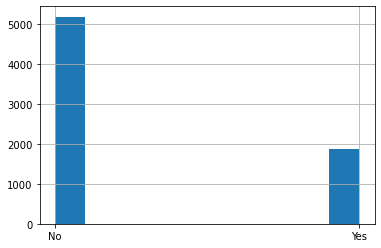

In [37]:
churnData['Churn'].hist()

<AxesSubplot:>

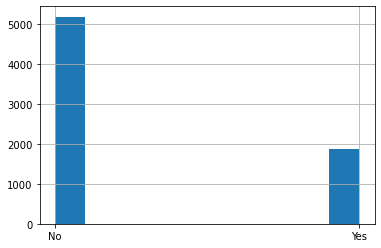

In [38]:
churnData['Churn'].hist()

In [39]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [40]:
numericData = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, churnData['Churn'])
classification.score(scaled_x, churnData['Churn'])

0.7911401391452506

In [41]:
#yes no split of churn data

5174/(5174+1869)

0.7346301292063041

In [42]:
# balancing the data by oversampling, otherwise the model will be trained towards the data we have more from 

counts = churnData['Churn'].value_counts()
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_rus, y_rus = rus.fit_sample(X, y)

In [44]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, y_rus)
classification.score(X, y_rus)

0.7356875334403424

In [45]:
ros = RandomOverSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_ros, y_ros = ros.fit_sample(X, y)

In [46]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, y_ros)
classification.score(X, y_ros)

0.7360842674913026

In [47]:
#The SMOTE algorithm can be broken down into foll. steps:
#Randomly pick a poin^t from the minority class.
#Compute the k-nearest neighbors (for some pre-specified k) for this point.
#Add k new points somewhere between the chosen point and each of its neighbors.

SyntaxError: invalid syntax (<ipython-input-47-9c35cfa55cfd>, line 1)

In [ ]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
#transformer = StandardScaler().fit(X)
#X = transformer.transform(X)
#y = churnData['Churn']
#X_sm, y_sm = smote.fit_sample(X, y)
#y_sm.value_counts()

In [ ]:
#numericData = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
#Y = pd.DataFrame(data=churnData, columns=['Churn'])


#transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
#scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
#classification = LogisticRegression(random_state=0, solver='lbfgs',
#                        multi_class='ovr').fit(scaled_x, churnData['Churn'])
#classification.score(scaled_x, churnData['Churn'])

In [ ]:
#Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [58]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl.value_counts()

ValueError: Found input variables with inconsistent numbers of samples: [6563, 7043]

In [59]:
transformer = StandardScaler().fit(X_tl)
X = transformer.transform(X_tl)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, y_tl)
classification.score(X, y_tl)

0.7924729544415664